In [1739]:
###########import packages##########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
%matplotlib
###########fix random seed for reproducability##########
seed=12
np.random.seed(seed)
###########loading data##########
fdata=pd.read_csv('database.csv',encoding="gbk")
raw_data=fdata.loc[:,[
                      'BET Surface Area cm2/g',
                      'Micropore ratio',
                      'Mesopore ratio',
                      'Macropore ratio',
                      'I/C Ratio(ionomer/catalyst)',
                      'Anodic Platinum Loading Amount mgPt cm-2',
                      'Anodic catalyst type x wt% Pt/C',
                      'Hot Press Temperature ℃',
                      'Hot Press Time min',
                      'Hot Press Pressure Mpa',
                      'Humidity %',
                      'Operating Temperature ℃',
                      'Flowing rate of H2 ml min-1 ',
                      'Flowing rate of O2 ml min-1 ',
                      'Back Pressure Mpa',
                      'Membrane Thickness',
                      'Cathodic Loading Amount mg cm-2',
                      'Co Cotent wt/%',
                      'Fe Cotent wt/%(ICP for metal)',
                      'N Content at/%',
                      'O Content at/%',
                      'S Content at/%',
                      'Pyridinic N+metal N Content ratio at/%',
                      'Pyrrolic N Content ratio at/%',
                      'Graphitic N Content ratio at/%',
                      'Oxidized N Content ratio at/%',#26features
                      'higher than 700'#label
                        ]]
###########handling missing values##########
median_raw_data=raw_data.median()
dict_median_raw_data=median_raw_data.to_dict()
data=raw_data.fillna(dict_median_raw_data)
###########train test splitting##########
param=data.iloc[:,0:26]
power=data.iloc[:,26]
X=param.values.astype(np.float32)
y=power.values.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15,random_state=seed)
###########building the decision tree##########
model=tree.DecisionTreeClassifier()
param = {
         'max_depth':range(8,11),

       }
grid = GridSearchCV(model,param_grid=param,cv=5)
grid.fit(X_train,y_train.astype(int))
model=grid.best_estimator_

Using matplotlib backend: Qt5Agg


In [1740]:
###########graphviz was chosen to generate the graph of the decision tree,install it in anaconda and the official website before use##########
import graphviz
###########giving feature names##########
dot_data=tree.export_graphviz(model,
                              out_file=None,
                              feature_names=[
                              'BET Surface Area cm2/g',
                              'Micropore ratio',
                              'Mesopore ratio',
                              'Macropore ratio',
                              'I/C Ratio(ionomer/catalyst)',
                              'Anodic Platinum Loading Amount mgPt cm-2',
                              'Anodic catalyst type x wt% Pt/C',
                              'Hot Press Temperature ℃',
                              'Hot Press Time min',
                              'Hot Press Pressure Mpa',
                              'Humidity %',
                              'Operating Temperature ℃',
                              'Flowing rate of H2 ml min-1 ',
                              'Flowing rate of O2 ml min-1 ',
                              'Back Pressure Mpa',
                              'Membrane Thickness',
                              'Cathodic Loading Amount mg cm-2',
                              'Co Cotent wt/%',
                              'Fe Cotent wt/%(ICP for metal)',
                              'N Content at/%',
                              'O Content at/%',
                              'S Content at/%',
                              'Pyridinic N+metal N Content ratio at/%',
                              'Pyrrolic N Content ratio at/%',
                              'Graphitic N Content ratio at/%',
                              'Oxidized N Content ratio at/%'],
                              filled=True,
                              rounded=True,
                              special_characters=True,
                              class_names=['No','Yes'])
graph=graphviz.Source(dot_data)

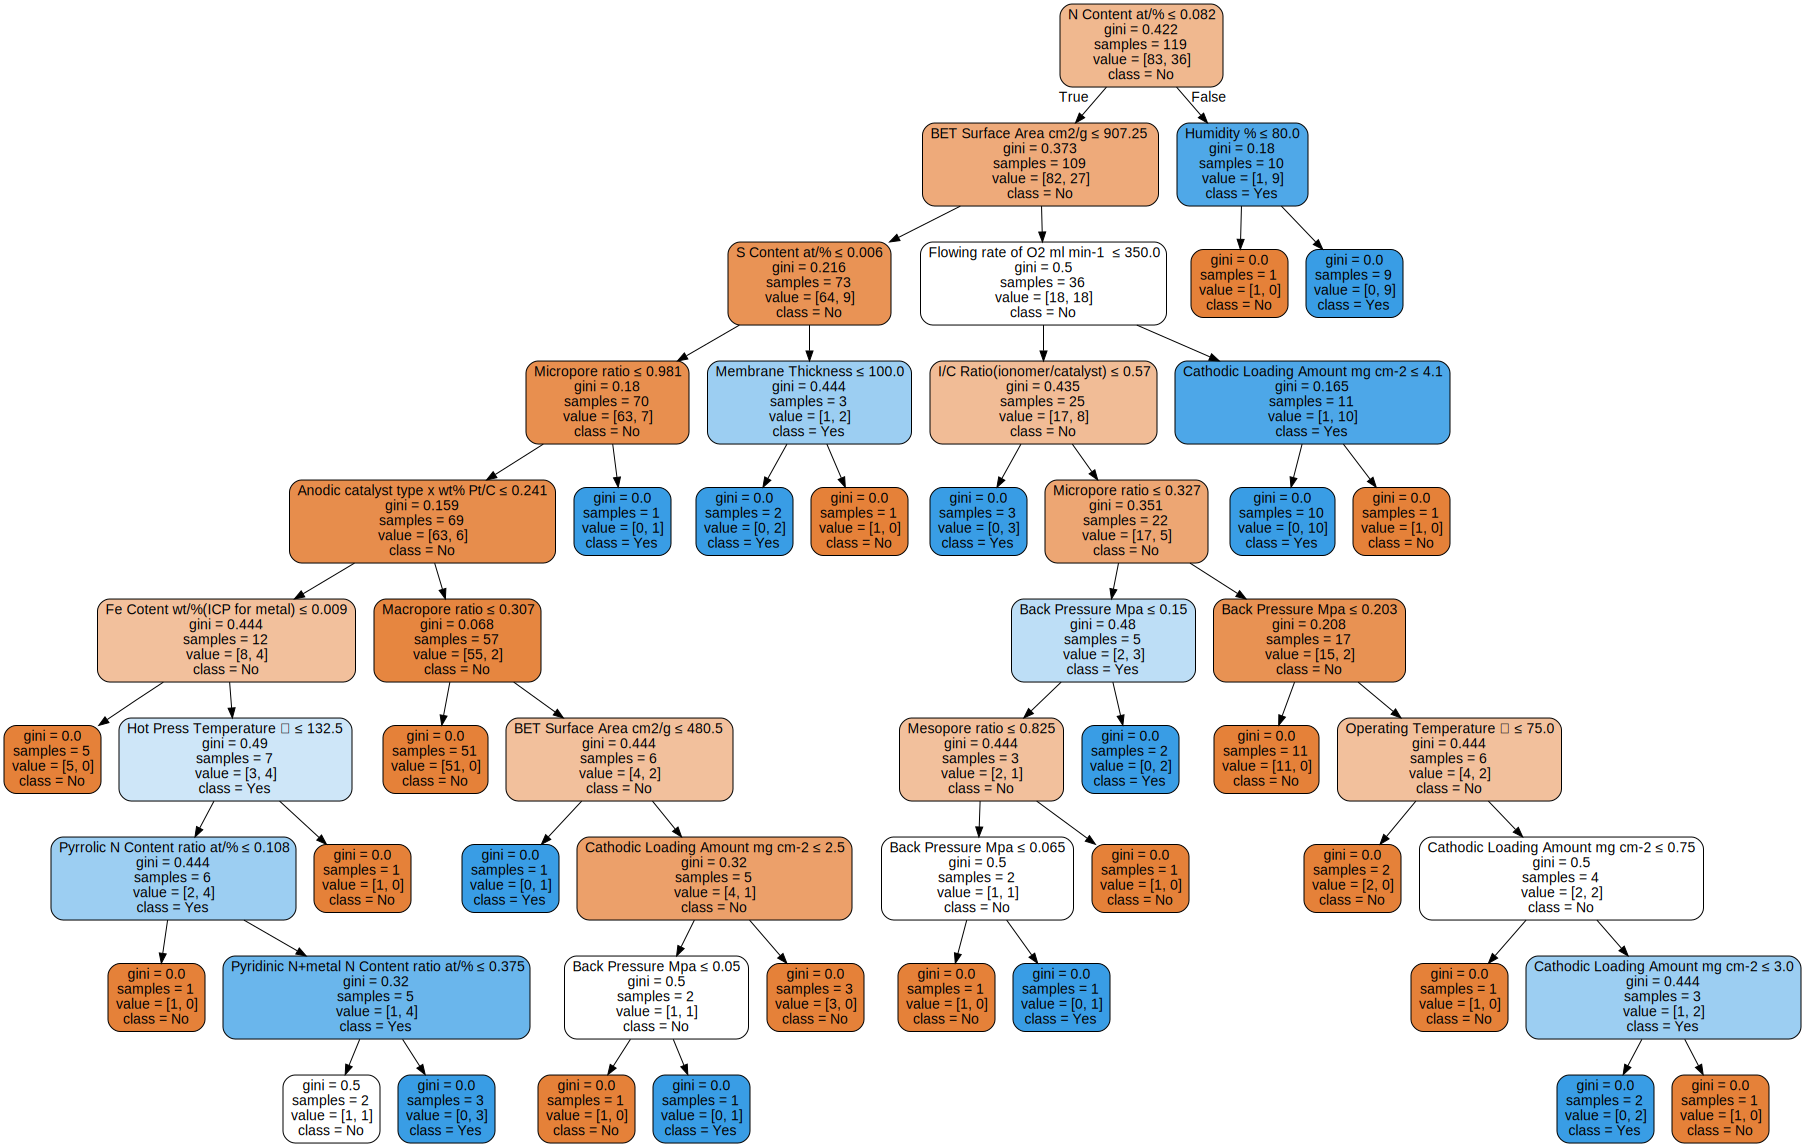

In [1741]:
###########visualization##########
graph

In [1742]:
###########generating confusion matrix to evaluate the prediction accuracy##########
from sklearn.metrics import accuracy_score
prediction_train=model.predict(X_train)
prediction_test=model.predict(X_test)
print(classification_report(y_train,prediction_train))
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        83
         1.0       1.00      0.97      0.99        36

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88        13
         1.0       0.78      0.88      0.82         8

    accuracy                           0.86        21
   macro avg       0.85      0.86      0.85        21
weighted avg       0.86      0.86      0.86        21



In [1670]:
# ###########generate a PDF file containing the figure##########
graph.render('decisiontree')

'decisiontree_12_8-10.pdf'